## FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

### decent tutorial: https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

notes: get corr on relavent dates only


TODO: https://en.wikipedia.org/wiki/Vector_autoregression


example at end of: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/


example: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

boston housing with vector autoregression

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas_datareader.data as web
import datetime
 
  
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

plt.style.use('fivethirtyeight')  
  
  
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Populating the interactive namespace from numpy and matplotlib


You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



# pretty fucking useless right?... 

<AxesSubplot:xlabel='Date'>

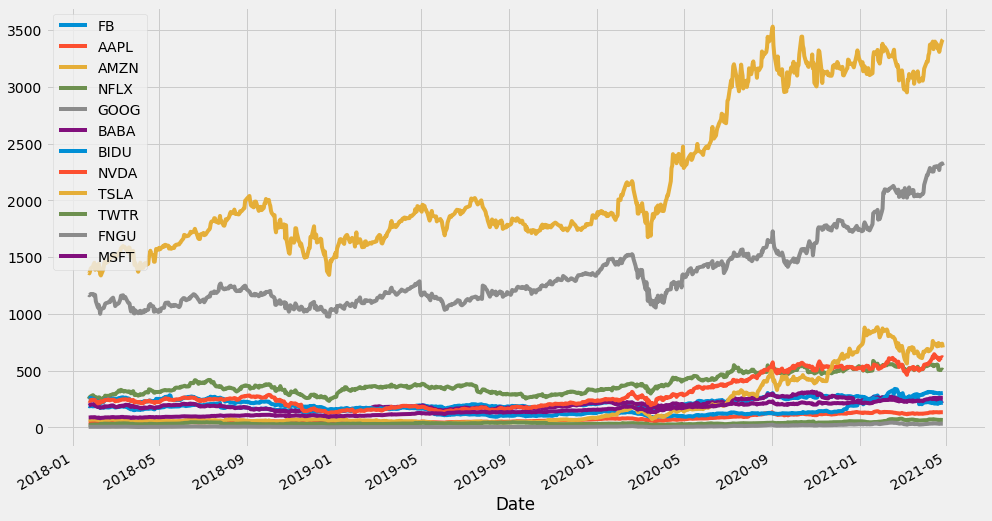

In [2]:
AAPL = web.DataReader("AAPL", "yahoo", start, end)
NFLX = web.DataReader("NFLX", "yahoo", start, end)
GOOG = web.DataReader("GOOG", "yahoo", start, end)
FB   = web.DataReader("FB",   "yahoo", start, end)
AMZN = web.DataReader("AMZN", "yahoo", start, end)
BABA = web.DataReader("BABA", "yahoo", start, end)
BIDU = web.DataReader("BIDU", "yahoo", start, end)
NVDA = web.DataReader("NVDA", "yahoo", start, end)
TSLA = web.DataReader("TSLA", "yahoo", start, end)
TWTR = web.DataReader("TWTR", "yahoo", start, end)

FNGU = web.DataReader("FNGU", "yahoo", start, end)

MSFT = web.DataReader("MSFT", "yahoo", start, end)

stocks = pd.DataFrame({
                      "FB"  : FB["Adj Close"],
                      "AAPL": AAPL["Adj Close"],
                      "AMZN": AMZN["Adj Close"],
                      "NFLX": NFLX["Adj Close"],
                      "GOOG": GOOG["Adj Close"],
                      "BABA": BABA["Adj Close"],
                      "BIDU": BIDU["Adj Close"],
                      "NVDA": NVDA["Adj Close"],
                      "TSLA": TSLA["Adj Close"],
                      "TWTR": TWTR["Adj Close"],
   
                      "FNGU": FNGU["Adj Close"],
    
                      "MSFT": MSFT["Adj Close"]
})
stocks=stocks.dropna()
stocks.plot(grid = True)

## FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

<AxesSubplot:xlabel='Date'>

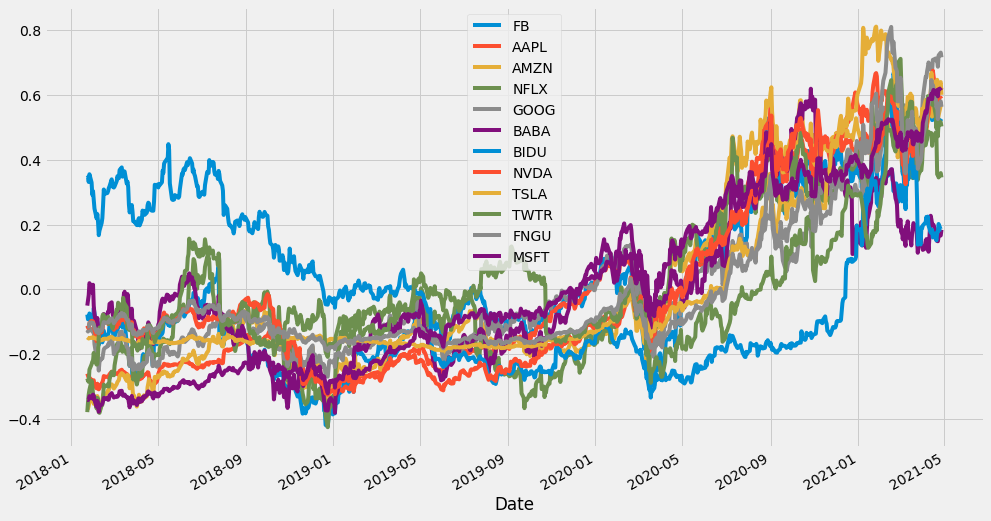

In [3]:
def normIt(myDf):
   return (myDf - myDf.mean()) / (myDf.max() - myDf.min())

# df_apple_norm = normIt(AAPL)
# df_google_norm = normIt(google)
# df_nflx_norm = normIt(NFLX)
# df_FB_norm = normIt(FB)
# df_AMZN_norm = normIt(AMZN)
# df_BABA_norm = normIt(BABA)
# df_BIDU_norm = normIt(BIDU)
# df_NVDA_norm = normIt(NVDA)
# df_TSLA_norm = normIt(TSLA)
# df_TWTR_norm = normIt(TWTR)

# df_microsoft_norm = normIt(microsoft)
stocks_norm = normIt(stocks)
stocks_norm= stocks_norm.dropna()
stocks_norm.plot()

<AxesSubplot:title={'center':'FNGU norm'}, xlabel='Date'>

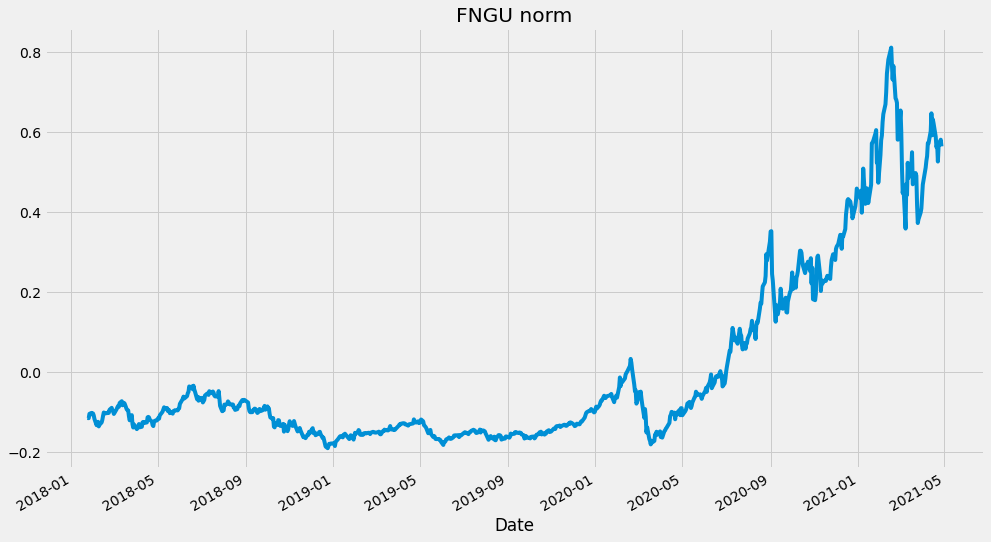

In [4]:
stocks_norm.FNGU.plot(grid = True,title = "FNGU norm")

In [5]:
stocks_norm.head()

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
Date,,,,,,,,,,,,
2018-01-23,-0.077721,-0.259884,-0.365800,-0.378750,-0.125804,-0.050094,0.344003,-0.112121,-0.148046,-0.274941,-0.114608,-0.341083
2018-01-24,-0.092534,-0.266141,-0.368095,-0.347513,-0.130047,-0.032671,0.346383,-0.118062,-0.149675,-0.281772,-0.114876,-0.341506
2018-01-25,-0.087614,-0.273041,-0.358769,-0.323680,-0.125508,-0.017661,0.331478,-0.117012,-0.151622,-0.285547,-0.114973,-0.338807
2018-01-26,-0.074283,-0.272153,-0.347774,-0.309778,-0.121458,0.019275,0.355318,-0.103677,-0.150392,-0.247617,-0.104227,-0.329650
2018-01-29,-0.095549,-0.280029,-0.340643,-0.281434,-0.121651,0.007427,0.329878,-0.096953,-0.148815,-0.231259,-0.101815,-0.330391


# ...

In [6]:
corrwith = stocks_norm.corr()
corrwith

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.929900,0.917724,0.873675,0.903035,0.889150,0.024642,0.913989,0.853065,0.728584,0.865531,0.903073
AAPL,0.929900,1.000000,0.962882,0.893754,0.929958,0.868062,-0.006115,0.951349,0.932585,0.691099,0.913543,0.962444
AMZN,0.917724,0.962882,1.000000,0.945988,0.876214,0.863785,-0.044247,0.941598,0.890256,0.664672,0.872746,0.942311
NFLX,0.873675,0.893754,0.945988,1.000000,0.835650,0.830347,0.106643,0.909454,0.863570,0.668717,0.866136,0.864301
GOOG,0.903035,0.929958,0.876214,0.835650,1.000000,0.752512,0.140294,0.888707,0.922654,0.812574,0.935480,0.917112
BABA,0.889150,0.868062,0.863785,0.830347,0.752512,1.000000,-0.013723,0.884270,0.755413,0.519052,0.763166,0.818861
BIDU,0.024642,-0.006115,-0.044247,0.106643,0.140294,-0.013723,1.000000,0.188406,0.245088,0.342246,0.346398,-0.187394
NVDA,0.913989,0.951349,0.941598,0.909454,0.888707,0.884270,0.188406,1.000000,0.920182,0.689132,0.928366,0.871995
TSLA,0.853065,0.932585,0.890256,0.863570,0.922654,0.755413,0.245088,0.920182,1.000000,0.791182,0.978552,0.861993
TWTR,0.728584,0.691099,0.664672,0.668717,0.812574,0.519052,0.342246,0.689132,0.791182,1.000000,0.847713,0.660305


In [7]:
corr_cumSum= corrwith.cumsum()
corr_cumSum

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.929900,0.917724,0.873675,0.903035,0.889150,0.024642,0.913989,0.853065,0.728584,0.865531,0.903073
AAPL,1.929900,1.929900,1.880606,1.767428,1.832993,1.757211,0.018527,1.865338,1.785650,1.419683,1.779073,1.865517
AMZN,2.847624,2.892782,2.880606,2.713416,2.709207,2.620996,-0.025720,2.806936,2.675907,2.084355,2.651819,2.807828
NFLX,3.721299,3.786536,3.826594,3.713416,3.544857,3.451343,0.080922,3.716390,3.539476,2.753072,3.517955,3.672129
GOOG,4.624334,4.716494,4.702808,4.549066,4.544857,4.203855,0.221217,4.605097,4.462130,3.565646,4.453435,4.589241
BABA,5.513484,5.584555,5.566593,5.379413,5.297369,5.203855,0.207493,5.489367,5.217544,4.084698,5.216602,5.408102
BIDU,5.538126,5.578440,5.522345,5.486055,5.437663,5.190131,1.207493,5.677773,5.462631,4.426945,5.563000,5.220709
NVDA,6.452116,6.529789,6.463943,6.395509,6.326370,6.074401,1.395899,6.677773,6.382813,5.116077,6.491365,6.092704
TSLA,7.305181,7.462374,7.354200,7.259079,7.249025,6.829814,1.640987,7.597955,7.382813,5.907258,7.469917,6.954698
TWTR,8.033765,8.153473,8.018871,7.927796,8.061599,7.348866,1.983233,8.287087,8.173995,6.907258,8.317630,7.615002


In [8]:
keepThese = corr_cumSum.loc[:, corr_cumSum.iloc[-1] > corr_cumSum.iloc[-1].mean()*1.1]
keepThese

,AAPL,NVDA,TSLA,FNGU
FB,0.929900,0.913989,0.853065,0.865531
AAPL,1.929900,1.865338,1.785650,1.779073
AMZN,2.892782,2.806936,2.675907,2.651819
NFLX,3.786536,3.716390,3.539476,3.517955
GOOG,4.716494,4.605097,4.462130,4.453435
BABA,5.584555,5.489367,5.217544,5.216602
BIDU,5.578440,5.677773,5.462631,5.563000
NVDA,6.529789,6.677773,6.382813,6.491365
TSLA,7.462374,7.597955,7.382813,7.469917
TWTR,8.153473,8.287087,8.173995,8.317630


In [9]:
# keepThese = keepThese.loc[:, keepThese.iloc[-1] > keepThese.iloc[-1].mean()]
# keepThese

In [10]:
dropAllButThese = keepThese.columns.to_list()
dropAllButThese.append("FNGU")
dropAllButThese=list(set(dropAllButThese))

In [11]:
corrwith[dropAllButThese]#.cumsum()

,FNGU,NVDA,TSLA,AAPL
FB,0.865531,0.913989,0.853065,0.929900
AAPL,0.913543,0.951349,0.932585,1.000000
AMZN,0.872746,0.941598,0.890256,0.962882
NFLX,0.866136,0.909454,0.863570,0.893754
GOOG,0.935480,0.888707,0.922654,0.929958
BABA,0.763166,0.884270,0.755413,0.868062
BIDU,0.346398,0.188406,0.245088,-0.006115
NVDA,0.928366,1.000000,0.920182,0.951349
TSLA,0.978552,0.920182,1.000000,0.932585
TWTR,0.847713,0.689132,0.791182,0.691099


<AxesSubplot:xlabel='Date'>

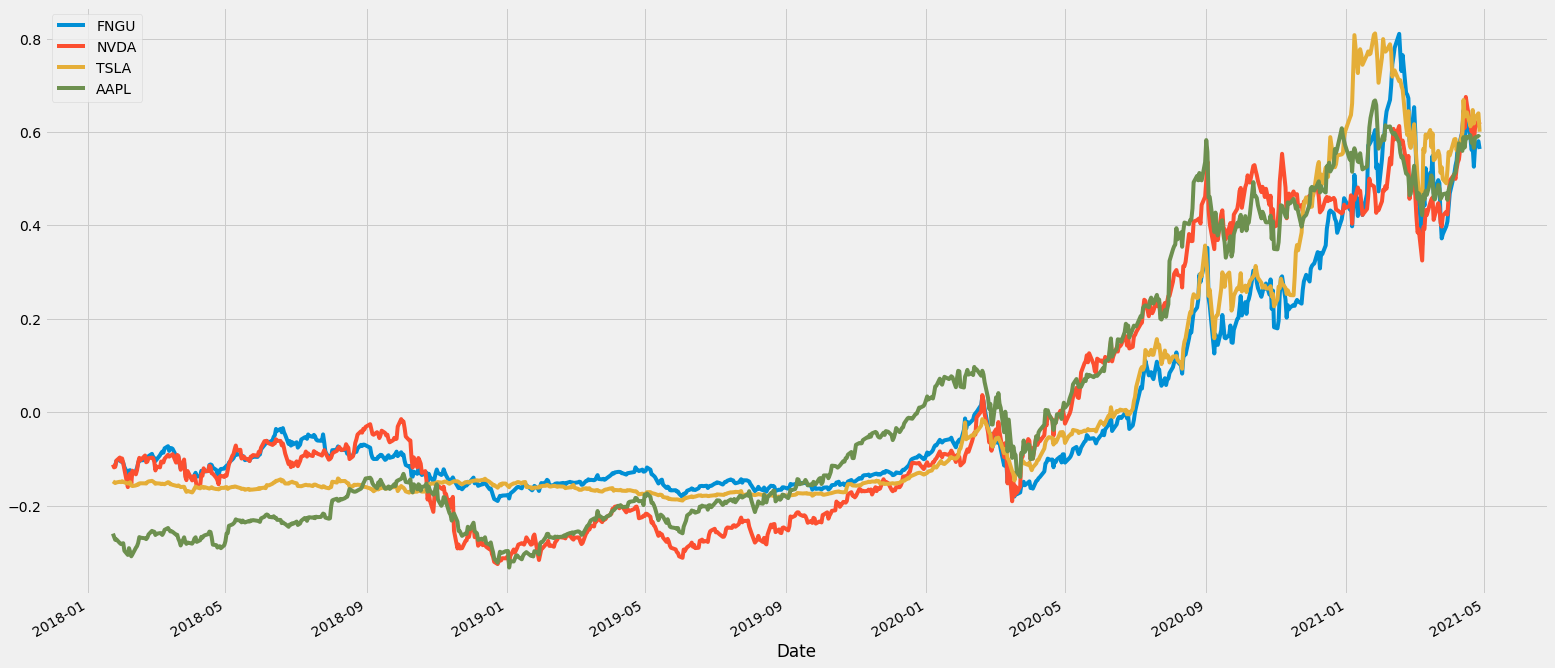

In [12]:
stocks_main = stocks[dropAllButThese]
stocks_main_norm= normIt(stocks_main)
stocks_main_norm.plot(figsize=(24,12))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

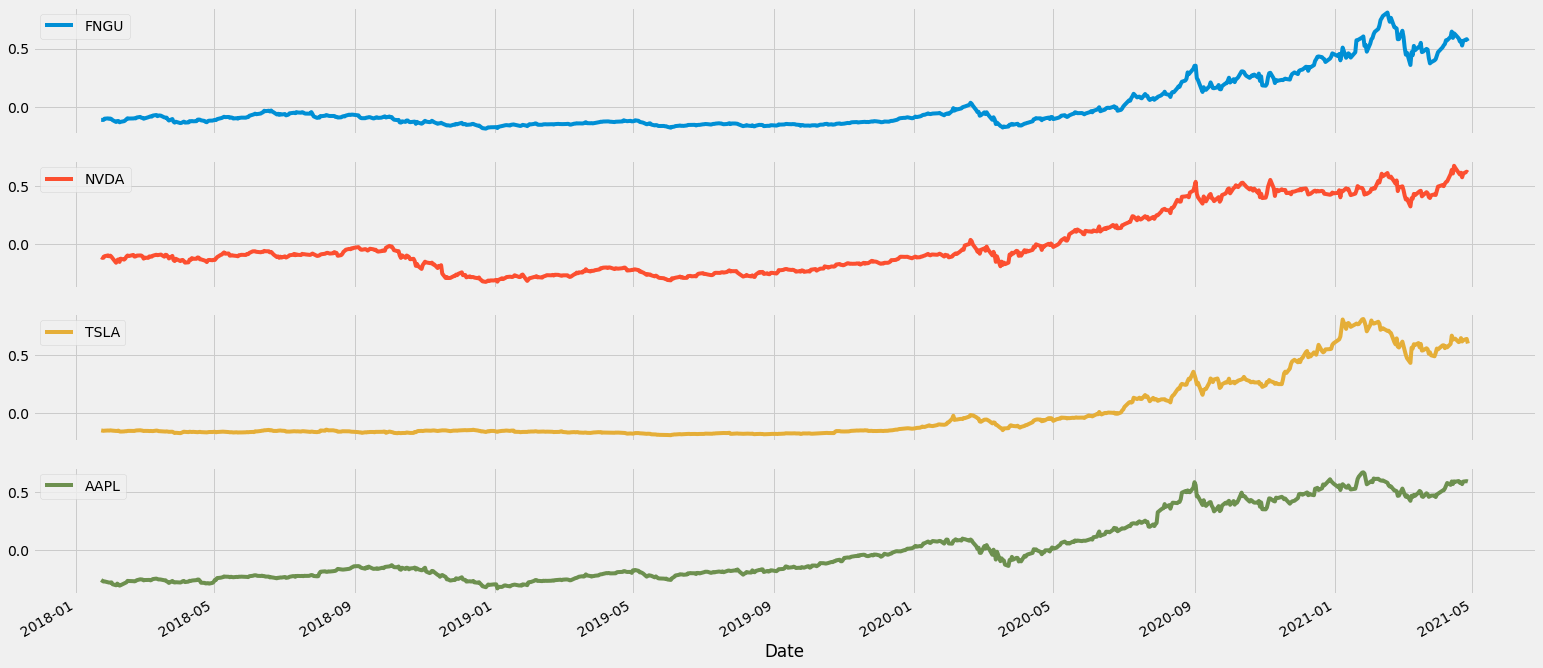

In [13]:
#stocks = stocks.loc[:,~stocks.columns.duplicated()]
stocks_main_norm.plot(subplots=True, figsize=(24, 12))

<AxesSubplot:xlabel='Date'>

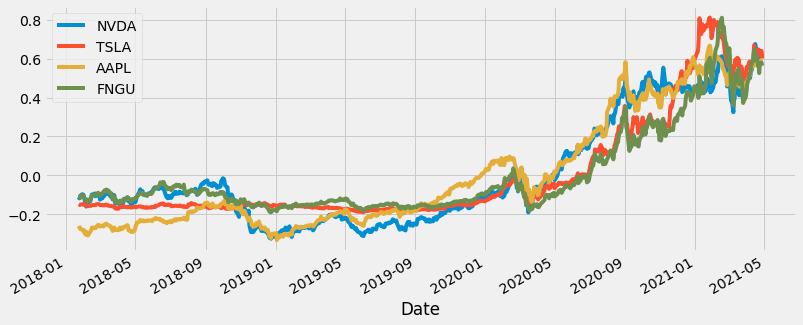

In [14]:
# I used to merge the top three into one pseudo-stock
theThree = stocks_main_norm.drop(['FNGU'], 1)
theThree['FNGU'] = normIt(web.DataReader("FNGU", "yahoo", start, end).Close.values)
theThree.plot(figsize = (12,5))

In [15]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import BayesianRidge

from fbprophet import Prophet
from sklearn.svm import SVR 
import xgboost

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df = stocks_main_norm

x = np.arange(df.shape[0]).reshape(-1, 1)
x_pred = np.arange(df.shape[0], df.shape[0]+20).reshape(-1, 1)

y = df.values

regs = [DecisionTreeRegressor(),
        AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), loss='square'),
        RandomForestRegressor(200),
        GradientBoostingRegressor(n_estimators=150, max_depth=5),
        BayesianRidge(n_iter=500, tol=0.0015, normalize=True)]
for reg in regs:
  try:
    _ = reg.fit(x, y)
  except:
    print('The Regressor can predict only one dimension, choosing FNGU')
    _ = reg.fit(x, stocks_main_norm["FNGU"].values)

  y_pred = reg.predict(x_pred)
  fig = plt.figure(figsize=(18, 6))
  _ = plt.plot(x, y)
  _ = plt.plot(x_pred, y_pred)
  _ = plt.title(str(type(reg)).split(".")[-1][:-2])
  plt.show()

# Prediction



In [ ]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
model = ARIMA(quickDF["FNGU"], order=(5,1,0))
model_fit = model.fit()
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)

print('Residuals...')
_ = residuals.plot()
_ = residuals.plot(kind='kde')
print(residuals.describe())

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

In [ ]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


In [ ]:
 
from matplotlib.dates import DateFormatter, WeekdayLocator,    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = web.DataReader("FNGU", "yahoo", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 